# Convolutional Neural Network
In this tutorial we have applied convolutional neural network to MNIST dataset. This is the unique MNIST tutorial where we have:
##### 1) Visualized MNIST dataset
##### 2) Visualized the Convolutional Model using Keras
##### 3) Plotting graph for Training loss vs Validation loss
##### 4) Plotting graph for Training accuracy vs Validation accuracy
##### 5) Saving the Model
##### 6) Loading the Model
##### 7) Prediction 
##### 8) Measuring the performance by plotting Confusion Matrix 

## Import the required libraries

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
%matplotlib inline
print("DONE")

DONE


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Input,InputLayer,Conv2D,Dense,Flatten,Reshape,MaxPooling2D,Dropout
from keras.datasets import mnist
from keras.models import load_model
print("DONE")

DONE


Using TensorFlow backend.


In [3]:
print(tf.__version__)
print(keras.__version__)
print(cv2.__version__)
print("DONE")

1.9.0
2.1.6
3.4.1
DONE


## Specify:
#### 1) Batch size
#### 2) Classes

In [4]:
batch_size = 128
num_classes = 10
print("Hello")

Hello


# Dataset
MNIST : The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.
##### 1)Load the dataset
##### 2)Split the dataset into test and train
##### 3)Visualize the MNIST data using matplotlib

11493376/11490434 [==============================] - 4s 0us/step


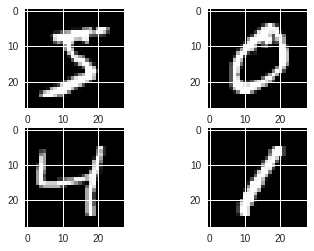

DONE


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

print('DONE')

In [6]:
print(len(x_train))
print(len(y_train))
print(len(y_test))
print(len(y_test))

60000
60000
10000
10000


## Preprocessing the dataset
##### 1) Reshaping
##### 2) Converting to float
##### 3) DIvide by 255

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28,1)
input_shape = (28, 28, 1)
print("DONE")

DONE


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('DONE')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
DONE


In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("DONE")

DONE


## Building the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
print("DONE")

## Compile the Model

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print("DONE")

DONE


## Fit the Model

In [12]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))
print("DONE")

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 201us/step - loss: 0.2655 - acc: 0.9183 - val_loss: 0.0626 - val_acc: 0.9815
Epoch 2/15
60000/60000 [==============================] - 10s 165us/step - loss: 0.0919 - acc: 0.9733 - val_loss: 0.0383 - val_acc: 0.9875
Epoch 3/15
29312/60000 [=============>................] - ETA: 4s - loss: 0.0659 - acc: 0.979660000/60000 [==============================] - 10s 164us/step - loss: 0.0667 - acc: 0.9799 - val_loss: 0.0388 - val_acc: 0.9862
Epoch 4/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.0563 - acc: 0.9833 - val_loss: 0.0316 - val_acc: 0.9893
Epoch 5/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0277 - val_acc: 0.9909
Epoch 6/15
  896/60000 [..............................] - ETA: 9s - loss: 0.0270 - acc: 0.992260000/60000 [==============================] - 10s 165us/step - loss: 0.0420 -

## Evaluate the Model

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("DONE")

Test loss: 0.026106026894799787
Test accuracy: 0.9925
DONE


## Save the Model

In [ ]:
#Saving the model
#model.save("mnist_weights_colab.h5py")
#print("DONE")

DONE


## Load the Model

In [ ]:
#Loading the model
#from keras.models import load_model
#model2 = load_model("mnist_weights_colab.h5py")
#print("DONE")

DONE


## Plotting the graphs
##### Training loss vs Validation loss
##### Training accuracy vs Validation accuracy

In [17]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(15)
print("DONE")

DONE


DONE


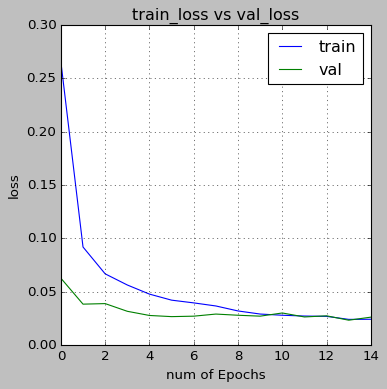

In [28]:
plt.figure(1,figsize=(5,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])
print("DONE")

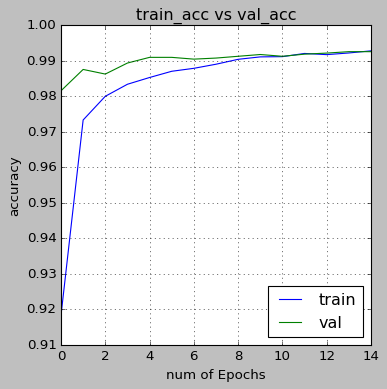

In [29]:
plt.figure(2,figsize=(5,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [20]:
from google.colab import files
from io import BytesIO
from PIL import Image
print("DONE")


DONE


## Prediction

In [21]:
uploaded = files.upload()
print("DONE") # We have performed this task using Google Colaboratory

Saving 6.png to 6.png
DONE


(28, 28)
(1, 28, 28)
DONE


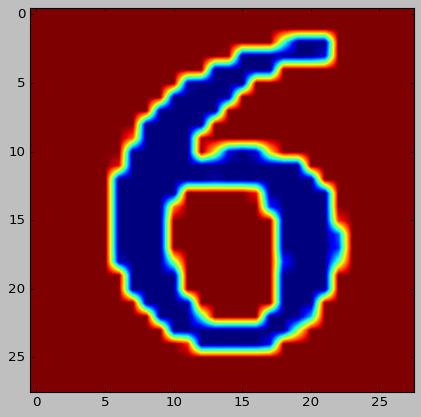

In [22]:
img=cv2.imread("./6.png")
plt.imshow(img)
test_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
plt.imshow(test_image)
test_image= np.expand_dims(test_image, axis=0)
print(test_image.shape)
#print("shape before",img.shape)
#est_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print("shape before",test_image.shape)
#test_image = Image_open(BytesIO(uploaded[0 (1).jpg]))
#plt.imshow(test_image)
print("DONE")


In [23]:
print(test_image.shape)
print((model.predict(test_image.reshape(1,28,28,1))))
print(model.predict_classes(test_image.reshape(1,28,28,1)))
print('DONE')

(1, 28, 28)
[[1.8737055e-06 7.1945027e-13 1.5204249e-10 8.4485819e-08 1.4819246e-14
  2.0203121e-02 9.7975153e-01 3.4787453e-15 4.3280281e-05 6.9741257e-12]]
[6]
DONE


In [ ]:
model.get_config()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable
print("DONE")

DONE




## Confusion Matrix

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8' 'class 9']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

#print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

                precision    recall  f1-score   support

       class 0       0.99      1.00      0.99       980
       class 1       0.99      1.00      1.00      1135
       class 2       0.99      0.99      0.99      1032
       class 3       0.99      1.00      1.00      1010
       class 4       0.99      0.99      0.99       982
       class 5       0.99      0.99      0.99       892
       class 6       1.00      0.99      0.99       958
       class 7       0.99      0.99      0.99      1028
class 8class 9       0.99      0.99      0.99       974

   avg / total       0.99      0.99      0.99     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 10, does not match size of target_names, 9
  .format(len(labels), len(target_names))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1023    0    1    0    0    4    1    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  975    0    1    0    1    5]
 [   3    0    0    5    0  882    1    0    0    1]
 [   3    2    0    1    2    1  947    0    2    0]
 [   0    2    3    0    0    0    0 1021    1    1]
 [   2    0    2    0    0    0    1    1  967    1]
 [   3    1    0    1    3    5    0    3    2  991]]


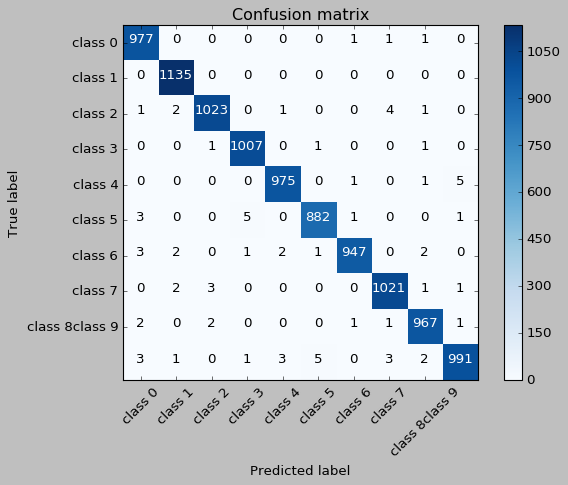

In [26]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()